In [1]:
import numpy as np
import pandas as pd 
import os
import json 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
business_data = '/kaggle/input/d/apexapaudel/yelp-dataset/yelp_academic_dataset_business/yelp_academic_dataset_business.json'
business=pd.read_json(business_data,lines=True,nrows=8000)
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9coQY05SXPMBGKHcVXWFMw,Verizon,2980 State St,Santa Barbara,CA,93105,34.440573,-119.727557,2.5,83,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping, Electronics, Mobile Phones, Professi...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
7996,UKKvuXEOTDj_RStMMUf1Mg,Easyford Meats,12165 Fort Road NW,Edmonton,AB,T5B 4H2,53.576679,-113.459281,4.0,6,0,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Butcher, Food","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
7997,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,Philadelphia,PA,19104,39.955757,-75.181993,4.0,381,1,"{'ByAppointmentOnly': 'False', 'WiFi': 'u'free''}","Public Transportation, Transportation, Train S...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
7998,RhRQhyGHurL9WqRoAn7luQ,Uptown Grill Breakfast,38 S 60th St,Philadelphia,PA,19139,39.960943,-75.241237,4.0,10,1,"{'RestaurantsReservations': 'False', 'Restaura...","Restaurants, American (New)","{'Monday': '6:0-15:0', 'Tuesday': '6:0-15:0', ..."


In [3]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [4]:
business=business[['business_id', 'name', 'address','stars', 'review_count', 'is_open']]

In [5]:
business.head()

,business_id,name,address,stars,review_count,is_open
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",5.0,7,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,3.0,15,1
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,3.5,22,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,4.0,80,1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,4.5,13,1


In [6]:
review_data = '/kaggle/input/d/apexapaudel/yelp-dataset/yelp_academic_dataset_review/yelp_academic_dataset_review.json'
review=pd.read_json(review_data,lines=True , nrows=8000)
review.drop(columns=['date'],inplace=True)
review

,review_id,user_id,business_id,stars,useful,funny,cool,text
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...
...,...,...,...,...,...,...,...,...
7995,bebawnCmU6eqR0tGWEgy-Q,Bgh05QmFK27ikcORkLDbJg,Q8YTUFvcSrT8a8UWxZvhxw,5,0,1,1,We were looking for a hands-on class instead o...
7996,tjHY3FgeePZX733HrZP6Ug,1Og-dLQ9t9VenURtoRKboQ,SLreQZjicOqB_7MCfJ8MdQ,4,1,0,1,Second time here while visiting the FIL. Wonde...
7997,sKdPo0Je5C_pVaCUknnMFg,zzgMuJgxmToqcJ5iu1TngQ,dcpWZ6Yk_S0HqTlNBi8jiA,3,0,0,0,"Tucked on 76 Ave is a small cozy cafe, usually..."
7998,eaRscPqzLUsljJdZ7QRTBA,cJCYCEfDL4n5TgU9y8RTWg,grjFEAN9gXOKQFEta4yBJg,5,2,1,1,These hand grenades don't play!! Thy definitel...


In [7]:
user_data = '/kaggle/input/d/apexapaudel/yelp-dataset/yelp_academic_dataset_user/yelp_academic_dataset_user.json'
user=pd.read_json(user_data,lines=True,nrows=8000)
user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,qCHCWU_nCP31HjZqRSB3Gg,Anna,988,2012-07-31 13:42:28,1957,305,1081,"2013,2014,2015,2016,2017,2018,2019,20,20,2021","ceC9qIoD6MDCmENjN11_mA, thssU_4Cg_5vzkDKN4qIOw...",118,...,7,5,5,0,49,173,85,85,57,5
7996,csA5LOQD_MPTXfnvkLLu5A,Joy,55,2010-12-20 21:38:33,96,19,26,,"_IO-C0_Vmt4ttgDndsYDGg, oeFiWvoOG0hpMOXXxblfyQ...",9,...,0,1,0,0,8,7,7,7,4,19
7997,yfqMkXxwWqZlIfswt7p6lw,Patrick,26,2010-10-13 17:43:23,14,2,6,,"5INm6dKEcXHDLeOMHN1fdQ, nU3iqIbu_udsi9sjiCwN_w...",0,...,0,0,0,0,0,0,0,0,0,0
7998,ffz89fq25qNnppjb6UoLoA,Ken,68,2009-05-01 05:50:06,49,9,10,,"6oAfIiC8TrHu-ohr3cv9SA, 5IGklMrS2cw88gDWSZEE2A...",0,...,0,0,0,0,0,1,2,2,1,1


In [8]:
user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [9]:
user=user[['user_id', 'name', 'review_count']]
user

,user_id,name,review_count
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665
3,SZDeASXq7o05mMNLshsdIA,Gwen,224
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79
...,...,...,...
7995,qCHCWU_nCP31HjZqRSB3Gg,Anna,988
7996,csA5LOQD_MPTXfnvkLLu5A,Joy,55
7997,yfqMkXxwWqZlIfswt7p6lw,Patrick,26
7998,ffz89fq25qNnppjb6UoLoA,Ken,68


In [10]:
data = business.merge(review,on='business_id')

In [11]:
data

,business_id,name,address,stars_x,review_count,is_open,review_id,user_id,stars_y,useful,funny,cool,text
0,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,3.5,22,0,IOmiYoBPtQsY_fh5uA4mXg,P-NTOAMFVSDFGkhcj4GaIQ,4,1,0,0,We are fans of Target. They seem to have a li...
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,4.0,80,1,BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...
2,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,4.5,100,0,oTTuahWNWzX_018P6O6_2g,z1Dfj8kz3KCArkXaIyaBIA,1,6,1,0,The worst Chicken Parm. Sandwich I've ever eat...
3,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,4.5,100,0,R7DC4sHDcklrk1s1K93FDA,HvgKiuV36e9SzNqeA5zOfA,4,0,0,0,"Zio's, previously known as Cesarina's is a lar..."
4,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,4.0,245,1,XYaDbPKyJAu4k2aUOIth5g,Qsk0aTclam9W_DIK6bx42A,5,0,0,0,Stopped in to check out this new spot around t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,4.0,381,1,b8y96NmoTLFG9A_mI65pdA,1hJJXtCULGN8NT2dQtYbMg,3,0,1,0,Basic big old city train station: cool old bui...
4364,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,4.0,381,1,l-30c7FAkM1bKXfdiWFg7g,jbOVoVtVXIqnhE_cp-yMnA,4,4,1,0,"I really like this station, and if you have to..."
4365,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,4.0,381,1,nFQrKvvFH0vdJFi_Ea0YAw,VllshpEAU55i0hOk7PybNQ,5,0,0,0,If you want to feel like you are in one of tho...
4366,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,4.0,381,1,jep8mQLiduJcizjTA5fUbg,ei8X5pyCur3d0CGb5EbnFA,2,8,0,2,"My family lives in and around Boston, so I mea..."


In [12]:
a=data.merge(user , on ="user_id")
a

,business_id,name_x,address,stars_x,review_count_x,is_open,review_id,user_id,stars_y,useful,funny,cool,text,name_y,review_count_y
0,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,4.5,205,1,kVm9hQ3JjNWHTXBTLxdT-w,E5bAc2-w34OC5xDfjoGEeg,5,0,0,0,"This place is fantastic! Delicious, simple, h...",Ali,25
1,eMjnw_7wp-CscyNh6Lu0ZA,AM&PM Locksmith,8540 Bustleton Ave,4.5,58,1,RAL0KKmWZpZn29HGrd_vmg,ZCVEZmTB_StK-UXA3WPVlQ,4,6,0,0,Quick 24hr effificent locksmith. Charlie was o...,Zanna,523
2,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,4.5,593,1,vzV5TsZT4KMpWPF6AftFYg,B4OSQb8hu_CnM99yLa0O7A,4,0,0,0,"I'm all about ice cream, really I am. But it w...",Amy,331
3,sB45WFgysT617bKWP_WJwA,Budweiser Brewery Experience,1200 Lynch St,4.5,605,1,Nseugyg1K-Bm-EMzTE_lgg,vJ_Vdzvrb5UzGaPAg3dtvA,5,1,0,0,"What a great tour, very informative. My famil...",Jason,137
4,0vCsslN-TYnDeOSNT4rIfg,Whole Foods Market,14598 Clay Terrace Blvd,3.5,44,1,k841fO30xGewmdE0xPitOg,63-2PK0__Z3Zr1X-2mu1wQ,4,4,2,2,We've been shopping here since this location w...,Betsy,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,0a8t_Th0jtWUMmtq0q2dqA,DK Sushi,3401 Walnut St,3.5,30,1,vCtnScoPCTazwqWZWhYPaQ,fOAGaSQUVtm8BdzGzm27Ng,5,0,0,0,"Holy crap, we had an awesome time here. We did...",Jonathan,38
312,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,4.0,381,1,yvTEMKzV5CFKhw1-Jf7oCA,ITa3vh5ERI90G_WP4SmGUQ,4,14,26,11,The Good.\n\n-There's a very decent hoagie sho...,Peter,3193
313,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,4.0,381,1,b8y96NmoTLFG9A_mI65pdA,1hJJXtCULGN8NT2dQtYbMg,3,0,1,0,Basic big old city train station: cool old bui...,Jonny,459
314,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,4.0,381,1,l-30c7FAkM1bKXfdiWFg7g,jbOVoVtVXIqnhE_cp-yMnA,4,4,1,0,"I really like this station, and if you have to...",Jeffrey,413


In [13]:
a.isnull().sum()

business_id       0
name_x            0
address           0
stars_x           0
review_count_x    0
is_open           0
review_id         0
user_id           0
stars_y           0
useful            0
funny             0
cool              0
text              0
name_y            0
review_count_y    0
dtype: int64

In [14]:
a.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
311    False
312    False
313    False
314    False
315    False
Length: 316, dtype: bool

In [15]:
df=a[a['is_open']==1]

In [16]:
df.reset_index(drop=True,inplace=True)
df

,business_id,name_x,address,stars_x,review_count_x,is_open,review_id,user_id,stars_y,useful,funny,cool,text,name_y,review_count_y
0,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,4.5,205,1,kVm9hQ3JjNWHTXBTLxdT-w,E5bAc2-w34OC5xDfjoGEeg,5,0,0,0,"This place is fantastic! Delicious, simple, h...",Ali,25
1,eMjnw_7wp-CscyNh6Lu0ZA,AM&PM Locksmith,8540 Bustleton Ave,4.5,58,1,RAL0KKmWZpZn29HGrd_vmg,ZCVEZmTB_StK-UXA3WPVlQ,4,6,0,0,Quick 24hr effificent locksmith. Charlie was o...,Zanna,523
2,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,4.5,593,1,vzV5TsZT4KMpWPF6AftFYg,B4OSQb8hu_CnM99yLa0O7A,4,0,0,0,"I'm all about ice cream, really I am. But it w...",Amy,331
3,sB45WFgysT617bKWP_WJwA,Budweiser Brewery Experience,1200 Lynch St,4.5,605,1,Nseugyg1K-Bm-EMzTE_lgg,vJ_Vdzvrb5UzGaPAg3dtvA,5,1,0,0,"What a great tour, very informative. My famil...",Jason,137
4,0vCsslN-TYnDeOSNT4rIfg,Whole Foods Market,14598 Clay Terrace Blvd,3.5,44,1,k841fO30xGewmdE0xPitOg,63-2PK0__Z3Zr1X-2mu1wQ,4,4,2,2,We've been shopping here since this location w...,Betsy,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0a8t_Th0jtWUMmtq0q2dqA,DK Sushi,3401 Walnut St,3.5,30,1,vCtnScoPCTazwqWZWhYPaQ,fOAGaSQUVtm8BdzGzm27Ng,5,0,0,0,"Holy crap, we had an awesome time here. We did...",Jonathan,38
229,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,4.0,381,1,yvTEMKzV5CFKhw1-Jf7oCA,ITa3vh5ERI90G_WP4SmGUQ,4,14,26,11,The Good.\n\n-There's a very decent hoagie sho...,Peter,3193
230,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,4.0,381,1,b8y96NmoTLFG9A_mI65pdA,1hJJXtCULGN8NT2dQtYbMg,3,0,1,0,Basic big old city train station: cool old bui...,Jonny,459
231,Xq-8-I0U8Artr7d70SjX-g,30th Street Station,2955 Market St,4.0,381,1,l-30c7FAkM1bKXfdiWFg7g,jbOVoVtVXIqnhE_cp-yMnA,4,4,1,0,"I really like this station, and if you have to...",Jeffrey,413


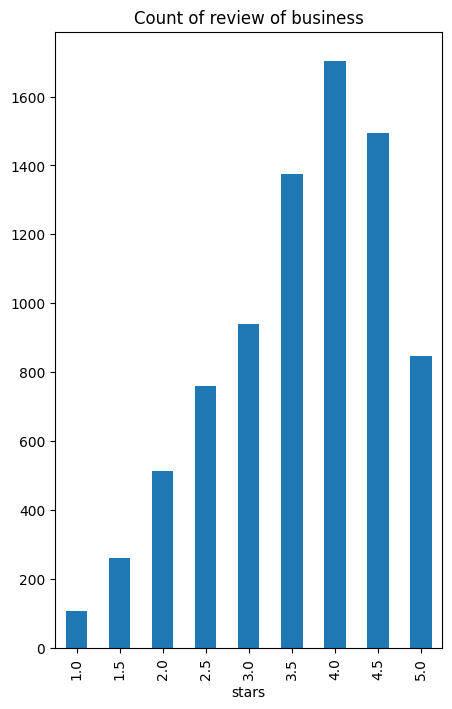

In [17]:
business['stars'].value_counts().sort_index().plot(kind='bar',title="Count of review of business",figsize=(5,8))
plt.style.use('ggplot')
plt.show()

In [18]:
example=df['text'][50]
example

"For Cool Springs on a Thursday when Bonefish grill was packed this place had a comfortable wait of 15 minutes. Also the food is always amazing, but that's a given"

In [19]:
token = nltk.word_tokenize(example)
token[:10]

['For',
 'Cool',
 'Springs',
 'on',
 'a',
 'Thursday',
 'when',
 'Bonefish',
 'grill',
 'was']

part of speech of each token like noun

In [20]:
tagged = nltk.pos_tag(token)
tagged[:10]

[('For', 'IN'),
 ('Cool', 'NNP'),
 ('Springs', 'NNP'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('Thursday', 'NNP'),
 ('when', 'WRB'),
 ('Bonefish', 'NNP'),
 ('grill', 'NN'),
 ('was', 'VBD')]

**VADER Sentiment Scoring**
 
 Using NLTK's SentiementIntensityAnalayzer to mark score of word as negative,neutral,positive.
 
 Uses bag of words approach.

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer 
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


compound let us know how neg or how positive the text is

In [22]:
sia.polarity_scores("I am feeling good.")

{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.5267}

In [23]:
sia.polarity_scores("Everything is falling apart")

{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.1531}

In [24]:
sia.polarity_scores("It can't be worse than this")

{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.3724}

Getting the polarity score of reviews from df

In [25]:
res={}
for i , row in tqdm(df.iterrows() , total= len(df)):
    text = row['text']
    myid= row['business_id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/233 [00:00<?, ?it/s]

In [26]:
a=pd.DataFrame(res).T
a

,neg,neu,pos,compound
ROeacJQwBeh05Rqg7F6TCg,0.049,0.791,0.160,0.6467
eMjnw_7wp-CscyNh6Lu0ZA,0.071,0.791,0.137,0.4881
oaboaRBUgGjbo2kfUIKDLQ,0.063,0.830,0.107,0.4490
sB45WFgysT617bKWP_WJwA,0.045,0.771,0.183,0.9746
0vCsslN-TYnDeOSNT4rIfg,0.008,0.731,0.262,0.9931
...,...,...,...,...
4WdDY97x4GdMYtyk1KQMnw,0.019,0.815,0.166,0.9790
0qu0fNTOsSmuREYVIMPuIQ,0.000,0.863,0.137,0.6369
-hVMfjPPEsSnga_gnYJx2w,0.040,0.702,0.259,0.9215
0a8t_Th0jtWUMmtq0q2dqA,0.028,0.714,0.258,0.9894


In [27]:
a=a.reset_index().rename(columns={"index":"business_id"})
a

,business_id,neg,neu,pos,compound
0,ROeacJQwBeh05Rqg7F6TCg,0.049,0.791,0.160,0.6467
1,eMjnw_7wp-CscyNh6Lu0ZA,0.071,0.791,0.137,0.4881
2,oaboaRBUgGjbo2kfUIKDLQ,0.063,0.830,0.107,0.4490
3,sB45WFgysT617bKWP_WJwA,0.045,0.771,0.183,0.9746
4,0vCsslN-TYnDeOSNT4rIfg,0.008,0.731,0.262,0.9931
...,...,...,...,...,...
180,4WdDY97x4GdMYtyk1KQMnw,0.019,0.815,0.166,0.9790
181,0qu0fNTOsSmuREYVIMPuIQ,0.000,0.863,0.137,0.6369
182,-hVMfjPPEsSnga_gnYJx2w,0.040,0.702,0.259,0.9215
183,0a8t_Th0jtWUMmtq0q2dqA,0.028,0.714,0.258,0.9894


In [28]:
new_df = df.merge(a, on="business_id")
new_df.head()

,business_id,name_x,address,stars_x,review_count_x,is_open,review_id,user_id,stars_y,useful,funny,cool,text,name_y,review_count_y,neg,neu,pos,compound
0,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,4.5,205,1,kVm9hQ3JjNWHTXBTLxdT-w,E5bAc2-w34OC5xDfjoGEeg,5,0,0,0,"This place is fantastic! Delicious, simple, h...",Ali,25,0.049,0.791,0.160,0.6467
1,eMjnw_7wp-CscyNh6Lu0ZA,AM&PM Locksmith,8540 Bustleton Ave,4.5,58,1,RAL0KKmWZpZn29HGrd_vmg,ZCVEZmTB_StK-UXA3WPVlQ,4,6,0,0,Quick 24hr effificent locksmith. Charlie was o...,Zanna,523,0.071,0.791,0.137,0.4881
2,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,4.5,593,1,vzV5TsZT4KMpWPF6AftFYg,B4OSQb8hu_CnM99yLa0O7A,4,0,0,0,"I'm all about ice cream, really I am. But it w...",Amy,331,0.063,0.830,0.107,0.4490
3,sB45WFgysT617bKWP_WJwA,Budweiser Brewery Experience,1200 Lynch St,4.5,605,1,Nseugyg1K-Bm-EMzTE_lgg,vJ_Vdzvrb5UzGaPAg3dtvA,5,1,0,0,"What a great tour, very informative. My famil...",Jason,137,0.045,0.771,0.183,0.9746
4,0vCsslN-TYnDeOSNT4rIfg,Whole Foods Market,14598 Clay Terrace Blvd,3.5,44,1,k841fO30xGewmdE0xPitOg,63-2PK0__Z3Zr1X-2mu1wQ,4,4,2,2,We've been shopping here since this location w...,Betsy,314,0.008,0.731,0.262,0.9931


Seeing the relation of stars and review of bussiness. 

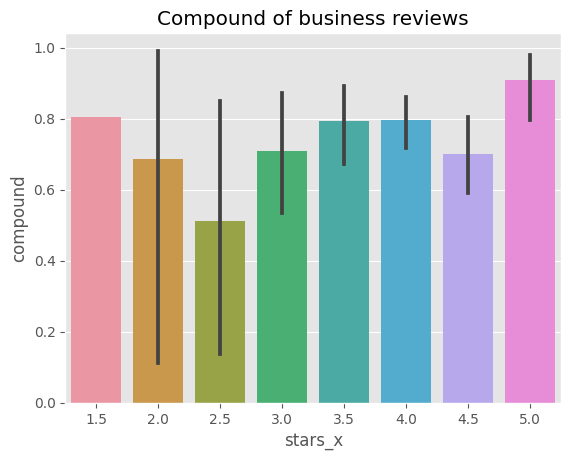

In [29]:
p=sns.barplot(data=new_df,x='stars_x',y='compound')
p.set_title("Compound of business reviews")
plt.show()

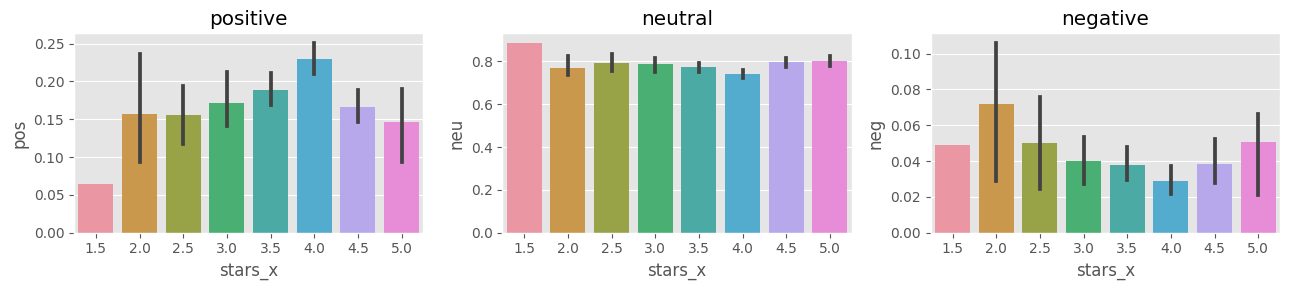

In [30]:
fig,axs=plt.subplots(1,3,figsize=(13,3))

sns.barplot(data=new_df,x="stars_x",y='pos',ax=axs[0])
sns.barplot(data=new_df,x="stars_x",y='neu',ax=axs[1])
sns.barplot(data=new_df,x="stars_x",y='neg',ax=axs[2])
axs[0].set_title("positive")
axs[1].set_title("neutral")
axs[2].set_title("negative")
plt.tight_layout()
plt.show()


**Roberta Pretrained Model**

Use a model trained for large data.

Transformer model not only accounts for words but also the context.

In [31]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Softmax shows output of model into probabilities representing over a set of class , used in outer layer of netwok.(0 to 1)acc to the output received which help us identify and classify the sentiment.

pre trained model that analysed the sentiment of large dataset from twitter is used. 

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [33]:
example

"For Cool Springs on a Thursday when Bonefish grill was packed this place had a comfortable wait of 15 minutes. Also the food is always amazing, but that's a given"

In [34]:
encoded = tokenizer(example,return_tensors='pt')
output=model(**encoded)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict ={
    'neg':scores[0],
    'neu':scores[1],
    'pos':scores[2]
}
scores_dict

{'neg': 0.0047165845, 'neu': 0.048595887, 'pos': 0.9466876}

In [35]:
#vaders score
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.6369}